In [ ]:
import pandas as pd
import json
import glob
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Pretrained embedding with structured data

In [ ]:
pretrain_structured_kick_train_val = pd.read_csv('/content/drive/MyDrive/Thesis/Final/pretrained_train_val_with_structured_final.csv')
pretrain_structured_kick_train_val.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,state_binary,project_number,country_displayable_name,photo,prelaunch_activated,staff_pick,parent_category,duration,preparation_days,quarter,creator_backing_count,has_video,goal_usd,gender,blurb_word_count,name_word_count
0,0.001549,0.191861,0.070232,-0.027889,0.327811,-0.014573,-0.002273,-0.032581,0.107002,0.057730,-0.035166,0.079102,-0.005442,-0.062071,0.105632,0.099387,-0.154076,0.038753,0.043547,0.024334,-0.044137,0.075117,0.116417,0.013008,-0.196921,0.064375,-0.008741,0.070227,0.013742,-0.079173,-0.124796,-0.051765,0.088412,0.066934,0.017416,0.049757,0.049486,0.067848,0.296692,-0.051275,0.183902,-0.263937,-0.052346,0.024620,-0.025080,0.044743,-0.120653,-0.017794,0.135856,-0.039999,0.070808,0.018751,-0.004307,-0.059973,-0.035144,0.136536,-0.044794,-0.015409,0.047479,0.040011,0.087983,0.394387,0.004448,0.046858,0.047068,-0.002112,-0.013852,0.100645,-0.063298,0.009302,0.012022,-0.059053,0.065870,-0.201134,0.029437,0.019420,0.083741,-6.350835,-0.020651,0.044665,0.082014,0.004817,0.827275,-0.036503,-0.078059,-0.091649,-0.0

In [ ]:
pretrain_structured_kick_train_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146089 entries, 0 to 146088
Columns: 784 entries, 0 to name_word_count
dtypes: bool(3), float64(769), int64(7), object(5)
memory usage: 870.9+ MB


In [ ]:
pretrain_structured_kick_test = pd.read_csv('/content/drive/MyDrive/Thesis/Final/pretrained_test_with_structured_final.csv')
pretrain_structured_kick_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,state_binary,project_number,country_displayable_name,photo,prelaunch_activated,staff_pick,parent_category,duration,preparation_days,quarter,creator_backing_count,has_video,goal_usd,gender,blurb_word_count,name_word_count
0,0.026167,0.043765,0.035662,-0.046763,0.100084,0.204272,0.043264,0.034776,0.132147,0.076886,-0.000026,0.244731,-0.042049,-0.152460,-0.001888,-0.116200,-0.182791,-0.056330,-0.075599,-0.025764,0.048453,-0.050121,-0.037337,-0.019634,-0.152174,0.040010,-0.100933,0.106329,0.275709,-0.084783,-0.156809,-0.099864,0.031674,0.063722,-0.093590,-0.001718,0.139442,0.046005,0.362427,0.076819,-0.041539,-0.055236,-0.144998,-0.150843,0.089847,0.040793,-0.004132,-0.040338,0.014780,-0.064968,0.028690,0.071257,0.035274,0.013179,0.043921,0.179903,-0.020797,-0.046404,0.055165,-0.040316,-0.126581,0.035380,-0.008009,0.049611,-0.075123,-0.063941,-0.024017,0.079174,-0.025793,-0.094060,0.045872,0.012982,-0.068103,-0.062789,0.018727,-0.007344,0.034698,-7.145373,-0.236648,-0.014188,0.086450,-0.087780,0.950002,-0.077297,0.073557,0.07

In [ ]:
pretrain_structured_kick_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16233 entries, 0 to 16232
Columns: 784 entries, 0 to name_word_count
dtypes: bool(3), float64(769), int64(7), object(5)
memory usage: 96.8+ MB


In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score
from collections import Counter
import warnings

warnings.filterwarnings("ignore")
SEED = 42
np.random.seed(SEED)

# ── 1) Load data ─────────────────────────────────────────────────────────────
train_val = pd.read_csv('/content/drive/MyDrive/Thesis/Final/pretrained_train_val_with_structured_final.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Final/pretrained_test_with_structured_final.csv')

# Log‐transform skewed numeric cols (fixed transformation, not data-dependent)
for col in ['goal_usd', 'preparation_days', 'creator_backing_count']:
    train_val[f'log_{col}'] = np.log1p(train_val[col])
    test_df[f'log_{col}'] = np.log1p(test_df[col])

# ── 2) Define features & targets ──────────────────────────────────────────────
emb_cols = [str(i) for i in range(768)]
num_cols = ['duration', 'log_goal_usd', 'log_preparation_days', 'log_creator_backing_count', 'blurb_word_count', 'name_word_count']
bool_cols = ['prelaunch_activated', 'staff_pick', 'has_video']
cat_cols = ['country_displayable_name', 'parent_category', 'gender', 'quarter']

# Full train/validation datasets
X_train_val = train_val[emb_cols + num_cols + bool_cols + cat_cols]
y_train_val = train_val['state_binary'].values

# Held‐out test dataset
X_test = test_df[emb_cols + num_cols + bool_cols + cat_cols]
y_test = test_df['state_binary'].values

# ── 3) Define preprocessing + classifier pipeline ───────────────────────────────
def create_pipeline(C=1.0):
    """Create a pipeline with preprocessing and classifier"""
    preprocessor = ColumnTransformer([
        ('emb', 'passthrough', emb_cols),
        ('num', StandardScaler(), num_cols),
        ('bool', 'passthrough', bool_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
    ])

    return Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(C=C, max_iter=1000, random_state=SEED))
    ])

# ── 4) Nested CV setup ───────────────────────────────────────────────────────
param_grid = {'classifier__C': [0.001, 0.01, 0.1, 1, 10]}
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED)

best_Cs = []
nested_f1 = []

print("🔁 Starting Nested CV…")
for fold, (tr_idx, val_idx) in enumerate(outer_cv.split(X_train_val, y_train_val), 1):
    # Split data for this fold
    X_tr = X_train_val.iloc[tr_idx]
    X_val = X_train_val.iloc[val_idx]
    y_tr = y_train_val[tr_idx]
    y_val = y_train_val[val_idx]

    # Create a fresh pipeline for this fold
    pipe = create_pipeline()

    # Inner CV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        scoring='f1',
        cv=inner_cv,
        n_jobs=-1
    )

    # Fit grid search on training data
    grid_search.fit(X_tr, y_tr)

    # Get best hyperparameter
    best_C = grid_search.best_params_['classifier__C']
    best_Cs.append(best_C)

    # Create and fit a fresh pipeline with best C
    best_pipe = create_pipeline(C=best_C)
    best_pipe.fit(X_tr, y_tr)

    # Evaluate on validation fold
    y_val_pred = best_pipe.predict(X_val)
    fold_f1 = f1_score(y_val, y_val_pred)
    nested_f1.append(fold_f1)

    print(f"Fold {fold}: best C = {best_C}, f1 score = {fold_f1:.4f}")

# ── 5) Pick modal C and report ────────────────────────────────────────────────
best_C = Counter(best_Cs).most_common(1)[0][0]
print(f"\n🔑 Selected C for final model: {best_C}")
print(f"Average nested CV F1 score: {np.mean(nested_f1):.4f}")

# ── 6) Retrain on all train_val ───────────────────────────────────────────────
# Create and fit final pipeline on all training data
final_pipe = create_pipeline(C=best_C)
final_pipe.fit(X_train_val, y_train_val)

# ── 7) Evaluate on the unseen test set ────────────────────────────────────────
y_pred_test = final_pipe.predict(X_test)
y_proba_test = final_pipe.predict_proba(X_test)[:, 1]

print("\n🧪 Final Test Evaluation on Unseen Test Set:")
print(f" • F1       : {f1_score(y_test, y_pred_test):.4f}")
print(f" • ROC-AUC  : {roc_auc_score(y_test, y_proba_test):.4f}")
print(f" • Precision: {precision_score(y_test, y_pred_test):.4f}")
print(f" • Recall   : {recall_score(y_test, y_pred_test):.4f}")

🔁 Starting Nested CV…
Fold 1: best C = 1, f1 score = 0.8576
Fold 2: best C = 0.1, f1 score = 0.8550
Fold 3: best C = 0.1, f1 score = 0.8549
Fold 4: best C = 0.1, f1 score = 0.8591
Fold 5: best C = 1, f1 score = 0.8551

🔑 Selected C for final model: 0.1
Average nested CV F1 score: 0.8563

🧪 Final Test Evaluation on Unseen Test Set:
 • F1       : 0.8579
 • ROC-AUC  : 0.8939
 • Precision: 0.8397
 • Recall   : 0.8770


In [ ]:
finetuned_structured_kick_train_val = pd.read_csv('/content/drive/MyDrive/Thesis/Final/finetuned_train_val_with_structured_final.csv')
finetuned_structured_kick_train_val.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,state_binary,project_number,country_displayable_name,photo,prelaunch_activated,staff_pick,parent_category,duration,preparation_days,quarter,creator_backing_count,has_video,goal_usd,gender,blurb_word_count,name_word_count
0,-0.916834,0.434121,0.495357,-0.033583,1.321835,0.568303,0.184554,0.165297,0.188446,0.036002,0.278579,0.384421,0.114574,0.319441,0.960269,0.658729,-0.044443,0.252885,0.235736,0.084395,-0.030423,0.039047,0.465959,0.096347,-0.574932,0.586269,0.369596,-0.419119,0.144700,1.338448,-0.338213,0.346674,0.433763,0.438662,-0.463205,0.124845,0.212162,0.503959,0.319854,0.166948,-0.062268,-0.004594,-0.010954,-0.529405,0.069373,0.811295,0.175039,0.610343,-0.103899,0.082885,-0.009756,0.086345,0.374211,-0.568875,-0.428311,0.857106,-0.160753,0.877803,-0.343968,-0.430743,0.484331,0.708946,-0.909774,0.506291,0.289476,0.022378,-0.198059,1.005943,-0.692019,0.028904,-0.059656,-1.101056,-0.395181,-0.045306,0.525420,-0.053682,-0.236208,-3.711664,-0.684999,0.558079,-0.151852,-0.269004,1.117880,-0.225609,0.213684,-0.518132,0.2858

In [ ]:
finetuned_structured_kick_train_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146089 entries, 0 to 146088
Columns: 784 entries, 0 to name_word_count
dtypes: bool(3), float64(769), int64(7), object(5)
memory usage: 870.9+ MB


In [ ]:
finetuned_structured_kick_test = pd.read_csv('/content/drive/MyDrive/Thesis/Final/finetuned_test_with_structured_final.csv')
finetuned_structured_kick_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,state_binary,project_number,country_displayable_name,photo,prelaunch_activated,staff_pick,parent_category,duration,preparation_days,quarter,creator_backing_count,has_video,goal_usd,gender,blurb_word_count,name_word_count
0,-0.224891,0.192596,-0.201484,0.078041,1.221696,1.375469,-0.115815,0.017435,0.578696,-0.251340,0.183905,0.574312,0.442732,0.313084,-0.484614,-0.483723,-1.023828,-0.224380,-0.665817,0.026301,-0.252221,0.430621,-0.500841,-0.134705,-1.038135,-0.388473,-0.553323,-0.064990,0.316958,-0.697550,-0.580837,0.071717,0.604599,0.735643,-0.840047,-0.803342,0.177092,-0.250243,0.333797,0.821403,0.383490,0.204965,0.925048,-0.229852,-0.123650,0.096440,1.436488,1.058734,-0.150706,0.536071,0.857166,0.261487,0.375122,0.353091,0.002093,0.889416,-0.217157,0.794549,0.282771,-0.173782,0.635448,0.835025,-0.153870,0.599833,-0.229019,0.025691,-0.049203,0.522498,-0.917933,-0.046802,0.089015,0.480428,0.014374,-0.388102,-0.549501,-0.599803,0.445418,-5.806149,-0.795549,0.751590,0.507350,-0.150550,1.514234,0.261864,0.064741,-0.669504,0.

In [ ]:
finetuned_structured_kick_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16233 entries, 0 to 16232
Columns: 784 entries, 0 to name_word_count
dtypes: bool(3), float64(769), int64(7), object(5)
memory usage: 96.8+ MB


In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score
from collections import Counter
import warnings

warnings.filterwarnings("ignore")
SEED = 42
np.random.seed(SEED)

# ── 1) Load data ─────────────────────────────────────────────────────────────
train_val = pd.read_csv('/content/drive/MyDrive/Thesis/Final/finetuned_train_val_with_structured_final.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/Final/finetuned_test_with_structured_final.csv')

# Log‐transform skewed numeric cols (fixed transformation, not data-dependent)
for col in ['goal_usd', 'preparation_days', 'creator_backing_count']:
    train_val[f'log_{col}'] = np.log1p(train_val[col])
    test_df[f'log_{col}'] = np.log1p(test_df[col])

# ── 2) Define features & targets ──────────────────────────────────────────────
emb_cols = [str(i) for i in range(768)]
num_cols = ['duration', 'log_goal_usd', 'log_preparation_days', 'log_creator_backing_count', 'blurb_word_count', 'name_word_count']
bool_cols = ['prelaunch_activated', 'staff_pick', 'has_video']
cat_cols = ['country_displayable_name', 'parent_category', 'gender', 'quarter']

# Full train/validation datasets
X_train_val = train_val[emb_cols + num_cols + bool_cols + cat_cols]
y_train_val = train_val['state_binary'].values

# Held‐out test dataset
X_test = test_df[emb_cols + num_cols + bool_cols + cat_cols]
y_test = test_df['state_binary'].values

# ── 3) Define preprocessing + classifier pipeline ───────────────────────────────
def create_pipeline(C=1.0):
    """Create a pipeline with preprocessing and classifier"""
    preprocessor = ColumnTransformer([
        ('emb', 'passthrough', emb_cols),
        ('num', StandardScaler(), num_cols),
        ('bool', 'passthrough', bool_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
    ])

    return Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(C=C, max_iter=1000, random_state=SEED))
    ])

# ── 4) Nested CV setup ───────────────────────────────────────────────────────
param_grid = {'classifier__C': [0.001, 0.01, 0.1, 1, 10]}
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED)

best_Cs = []
nested_f1 = []

print("🔁 Starting Nested CV…")
for fold, (tr_idx, val_idx) in enumerate(outer_cv.split(X_train_val, y_train_val), 1):
    # Split data for this fold
    X_tr = X_train_val.iloc[tr_idx]
    X_val = X_train_val.iloc[val_idx]
    y_tr = y_train_val[tr_idx]
    y_val = y_train_val[val_idx]

    # Create a fresh pipeline for this fold
    pipe = create_pipeline()

    # Inner CV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        scoring='f1',
        cv=inner_cv,
        n_jobs=-1
    )

    # Fit grid search on training data
    grid_search.fit(X_tr, y_tr)

    # Get best hyperparameter
    best_C = grid_search.best_params_['classifier__C']
    best_Cs.append(best_C)

    # Create and fit a fresh pipeline with best C
    best_pipe = create_pipeline(C=best_C)
    best_pipe.fit(X_tr, y_tr)

    # Evaluate on validation fold
    y_val_pred = best_pipe.predict(X_val)
    fold_f1 = f1_score(y_val, y_val_pred)
    nested_f1.append(fold_f1)

    print(f"Fold {fold}: best C = {best_C}, f1 score = {fold_f1:.4f}")

# ── 5) Pick modal C and report ────────────────────────────────────────────────
best_C = Counter(best_Cs).most_common(1)[0][0]
print(f"\n🔑 Selected C for final model: {best_C}")
print(f"Average nested CV F1 score: {np.mean(nested_f1):.4f}")

# ── 6) Retrain on all train_val ───────────────────────────────────────────────
# Create and fit final pipeline on all training data
final_pipe = create_pipeline(C=best_C)
final_pipe.fit(X_train_val, y_train_val)

# ── 7) Evaluate on the unseen test set ────────────────────────────────────────
y_pred_test = final_pipe.predict(X_test)
y_proba_test = final_pipe.predict_proba(X_test)[:, 1]

print("\n🧪 Final Test Evaluation on Unseen Test Set:")
print(f" • F1       : {f1_score(y_test, y_pred_test):.4f}")
print(f" • ROC-AUC  : {roc_auc_score(y_test, y_proba_test):.4f}")
print(f" • Precision: {precision_score(y_test, y_pred_test):.4f}")
print(f" • Recall   : {recall_score(y_test, y_pred_test):.4f}")

🔁 Starting Nested CV…
Fold 1: best C = 0.01, f1 score = 0.8875
Fold 2: best C = 0.01, f1 score = 0.8859
Fold 3: best C = 0.01, f1 score = 0.8852
Fold 4: best C = 0.01, f1 score = 0.8870
Fold 5: best C = 0.01, f1 score = 0.8909

🔑 Selected C for final model: 0.01
Average nested CV F1 score: 0.8873

🧪 Final Test Evaluation on Unseen Test Set:
 • F1       : 0.8611
 • ROC-AUC  : 0.9016
 • Precision: 0.8461
 • Recall   : 0.8766


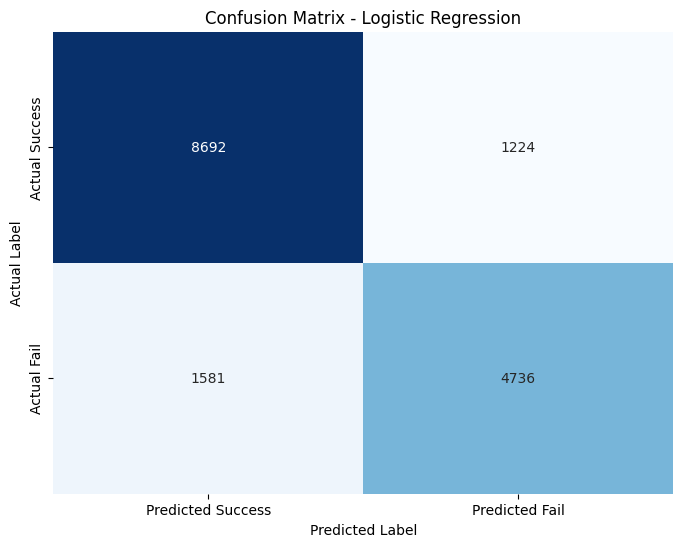


Overall Error Rate: 17.28%



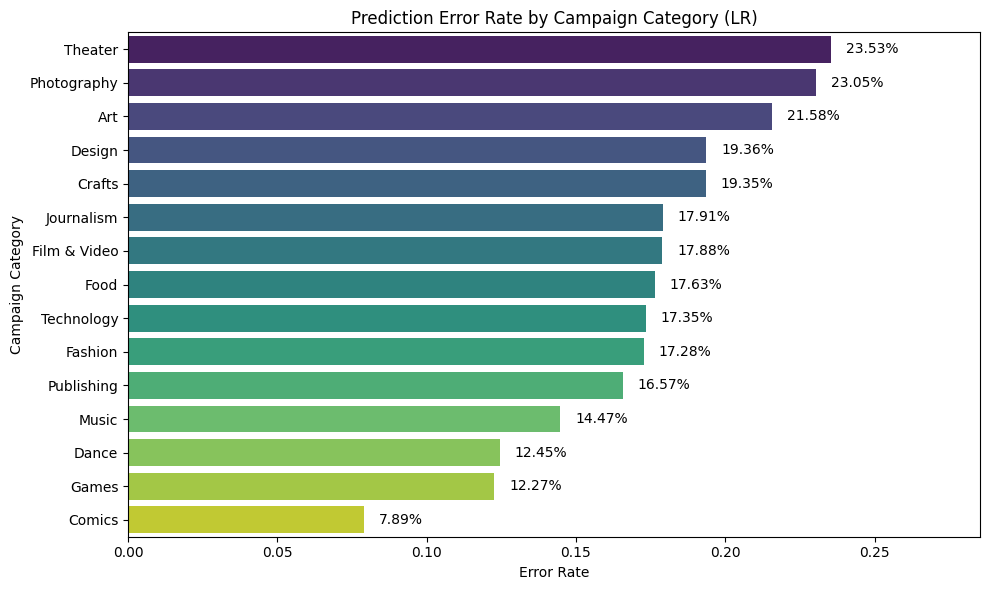

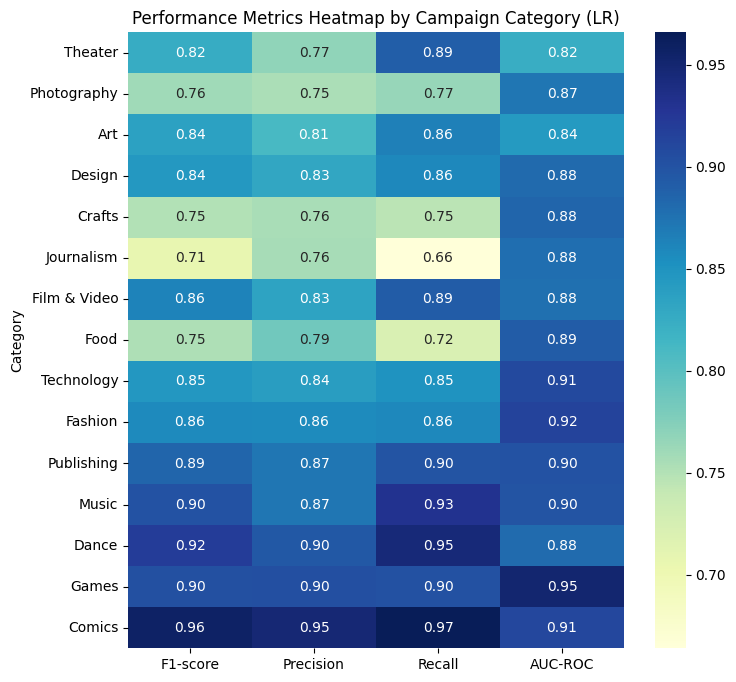

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Add predictions to test_df
test_df['predicted'] = y_pred_test

cm = confusion_matrix(y_test, y_pred_test, labels=[1, 0])

plt.figure(figsize=(8,6))

# heatmap을 출력할 때 행렬의 순서를 명시적으로 맞춰줍니다 (TP, FN이 위, FP, TN이 아래)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Success', 'Predicted Fail'],
            yticklabels=['Actual Success', 'Actual Fail'],
            cbar=False)

# y축의 순서를 직접 맞추기 위해 yticks를 수동으로 설정
plt.yticks(ticks=[0.5, 1.5], labels=['Actual Success', 'Actual Fail'], rotation=90, va='center')

plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Overall Error rate
overall_error_rate = (cm[0,1] + cm[1,0]) / cm.sum()
print(f"\nOverall Error Rate: {overall_error_rate:.2%}\n")

# Category-Specific Error Analysis
category_errors = []
for category in test_df['parent_category'].unique():
    df_cat = test_df[test_df['parent_category'] == category]
    cat_error_rate = (df_cat['state_binary'] != df_cat['predicted']).mean()
    precision = precision_score(df_cat['state_binary'], df_cat['predicted'])
    recall = recall_score(df_cat['state_binary'], df_cat['predicted'])
    f1 = f1_score(df_cat['state_binary'], df_cat['predicted'])
    auc = roc_auc_score(df_cat['state_binary'], final_pipe.predict_proba(df_cat[emb_cols + num_cols + bool_cols + cat_cols])[:,1])

    category_errors.append({
        'Category': category,
        'Error Rate': cat_error_rate,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'AUC-ROC': auc
    })

# Convert to DataFrame
cat_error_df = pd.DataFrame(category_errors).sort_values(by='Error Rate', ascending=False)

# Plot category-specific error rates
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Error Rate', y='Category', data=cat_error_df, palette='viridis')
plt.title('Prediction Error Rate by Campaign Category (LR)')
plt.xlabel('Error Rate')
plt.ylabel('Campaign Category')
plt.xlim(0, cat_error_df['Error Rate'].max() + 0.05)

# Correctly annotate bars based on the plot itself
for bar in bar_plot.patches:
    width = bar.get_width()
    plt.text(width + 0.005,
             bar.get_y() + bar.get_height() / 2,
             f'{width:.2%}',
             va='center')

plt.tight_layout()
plt.show()
# Heatmap for metrics by category
plt.figure(figsize=(8,8))
sns.heatmap(cat_error_df.set_index('Category')[['F1-score', 'Precision', 'Recall', 'AUC-ROC']],
            annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Performance Metrics Heatmap by Campaign Category (LR)')
plt.show()

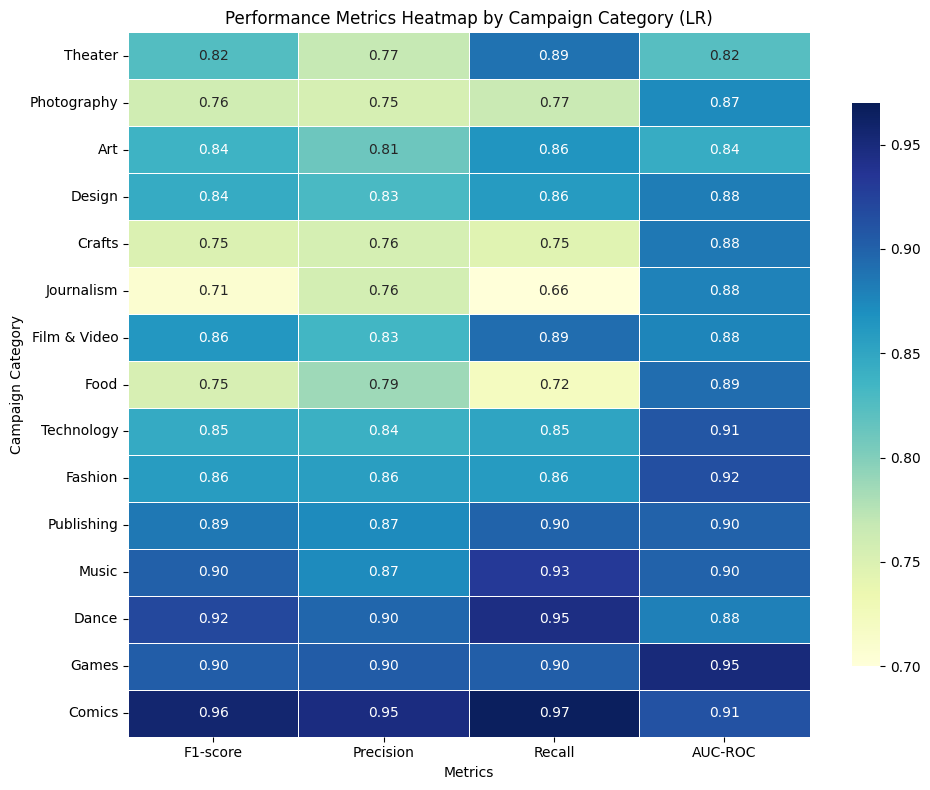

In [21]:
plt.figure(figsize=(10, 8))

# MLP와 같은 cmap과 vmin, vmax 설정 (0.7~0.97로 설정된 것으로 보임)
sns.heatmap(
    cat_error_df.set_index('Category')[['F1-score', 'Precision', 'Recall', 'AUC-ROC']],
    annot=True,
    cmap='YlGnBu',  # 동일한 컬러맵 사용
    fmt='.2f',
    linewidths=0.7,
    linecolor='white',
    cbar_kws={'shrink': 0.8},
    vmin=0.70,  # 컬러바 최소값 고정
    vmax=0.97   # 컬러바 최대값 고정
)

plt.title('Performance Metrics Heatmap by Campaign Category (LR)')
plt.ylabel('Campaign Category')
plt.xlabel('Metrics')
plt.tight_layout()
plt.show()


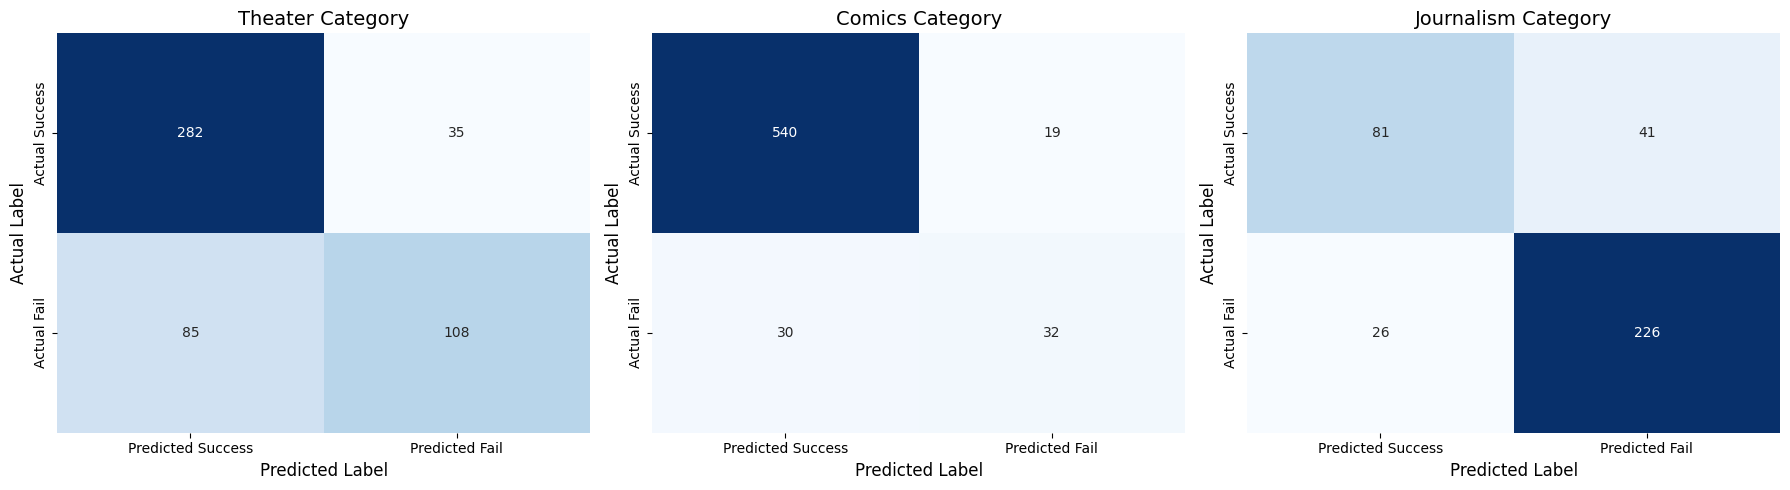

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

categories = ['Theater', 'Comics', 'Journalism']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, category in enumerate(categories):
    df_cat = test_df[test_df['parent_category'] == category]

    # 기본 혼동행렬 계산
    cm = confusion_matrix(df_cat['state_binary'], df_cat['predicted'], labels=[1, 0])

    # 명시적으로 순서 재배열 (TP, FP / FN, TN 형태로 만듦)
    cm_reordered = cm[[0, 1]][:, [0, 1]]

    # 시각화 (이제는 y축 반전 없이 그대로 쓰면 됨)
    sns.heatmap(cm_reordered, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['Predicted Success', 'Predicted Fail'],
                yticklabels=['Actual Success', 'Actual Fail'],
                cbar=False)

    axes[i].set_title(f'{category} Category', fontsize=14)
    axes[i].set_xlabel('Predicted Label', fontsize=12)
    axes[i].set_ylabel('Actual Label', fontsize=12)

plt.tight_layout()
plt.show()


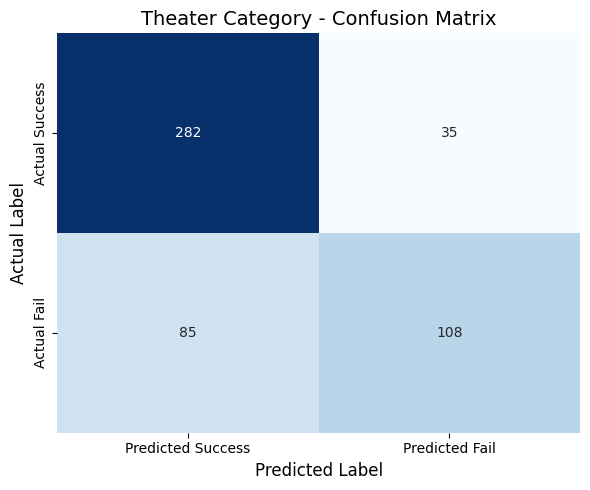

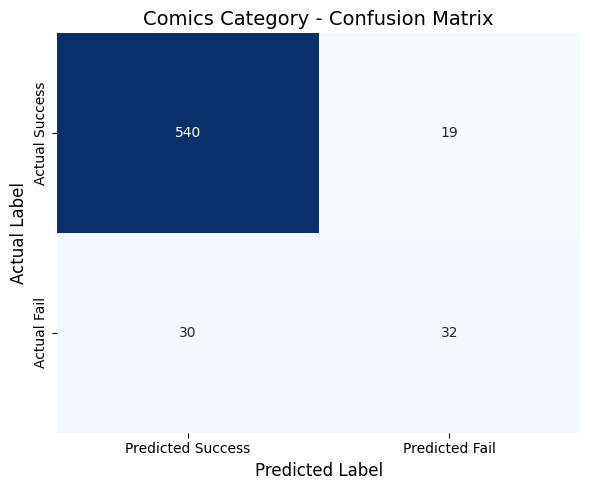

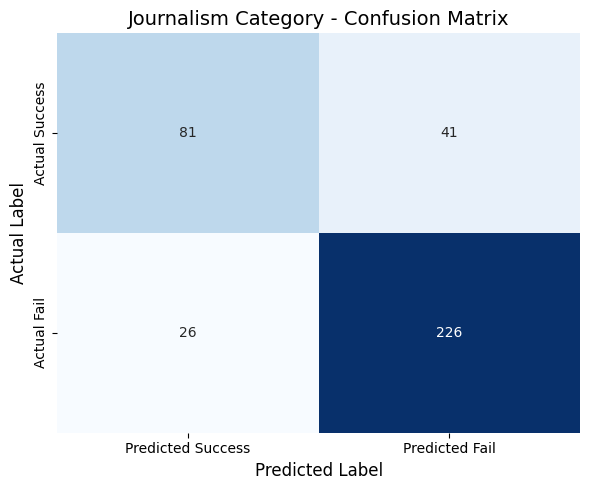

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

categories = ['Theater', 'Comics', 'Journalism']

for category in categories:
    df_cat = test_df[test_df['parent_category'] == category]

    # 혼동 행렬 계산 (TP, FN / FP, TN)
    cm = confusion_matrix(df_cat['state_binary'], df_cat['predicted'], labels=[1, 0])

    # 개별 figure 생성
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Success', 'Predicted Fail'],
                yticklabels=['Actual Success', 'Actual Fail'],
                cbar=False)

    plt.title(f'{category} Category - Confusion Matrix', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('Actual Label', fontsize=12)

    plt.tight_layout()

    # 각 카테고리의 혼동행렬을 개별 파일로 저장
    plt.savefig(f'confusion_matrix_{category.lower()}.png', dpi=300)


plt.show()